# Pittsburgh Demographics Comparison Analysis
This notebook completes a basic analysis of the demographics of Pittsburgh City, Pennsylvania. This notebook is divided into two major sections: the first section compares Pittsburgh City demographics within it's geographic context of Allegheny County and the state of Pennsylvania, while the second compares Pittsburgh with other comparable American cities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('CensusQuickFacts.csv').rename(columns = {'Unnamed: 0': 'Geo'})
df

,Geo,TotalPop,2010PopChange,Percent65andOver,PercentWhiteAlone,PercentBlackAlone,OwnershipRate,MedianValueofOwnedUnits,MedianGrossRent,HouseholdSize,BachelorsDegreeorHigher,InCivilianLaborForce,MedianIncome,PovertyRate,FIPS
0,Pittsburgh,300286,-0.016,0.147,0.668,0.230,0.472,125000,958,2.02,0.446,0.637,48711,0.205,4261000
1,Allegheny County,1216045,-0.006,0.193,0.799,0.134,0.643,154700,890,2.19,0.416,0.649,61043,0.108,42003
2,Pennsylvania,12801989,0.008,0.187,0.816,0.120,0.689,180200,938,2.45,0.314,0.627,61744,0.120,42
3,Philadelphia,1584064,0.038,0.134,0.407,0.421,0.530,163000,1042,2.55,0.297,0.609,45297,0.243,4260000
4,Columbus,898553,0.139,0.102,0.586,0.290,0.447,151600,961,2.39,0.366,0.706,53745,0.195,3918000
5,Cleveland,389009,-0.039,0.140,0.400,0.488,0.416,69600,719,2.18,0.175,0.591,30097,0.327,3916000
6,Baltimore City,593490,-0.044,0.136,0.305,0.624,0.475,160100,1073,2.45,0.319,0.618,50379,0.212,2404000
7,Washington D.C.,705749,0.173,0.121,0.413,0.463,0.416,601500,1541,2.30,0.585,0.699,86420,0.162,1150000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Geo                      8 non-null      object 
 1   TotalPop                 8 non-null      int64  
 2   2010PopChange            8 non-null      float64
 3   Percent65andOver         8 non-null      float64
 4   PercentWhiteAlone        8 non-null      float64
 5   PercentBlackAlone        8 non-null      float64
 6   OwnershipRate            8 non-null      float64
 7   MedianValueofOwnedUnits  8 non-null      int64  
 8   MedianGrossRent          8 non-null      int64  
 9   HouseholdSize            8 non-null      float64
 10  BachelorsDegreeorHigher  8 non-null      float64
 11  InCivilianLaborForce     8 non-null      float64
 12  MedianIncome             8 non-null      int64  
 13  PovertyRate              8 non-null      float64
 14  FIPS                     8 non

In [4]:
# Create a new dataframe that lists the source of each variable
point_est = ['TotalPop','Percent65andOver','PercentWhiteAlone','PercentBlackAlone']
change_fr_2010 = ['2010PopChange']
multi_yr_est = ['OwnershipRate','MedianValueofOwnedUnits','MedianGrossRent','HouseholdSize',
                'BachelorsDegreeorHigher','InCivilianLaborForce','MedianIncome','PovertyRate']

source = []

for i in range(len(df.columns)):
    if df.columns[i] in point_est:
        source.append('July 1, 2019 Population Estimates')
    elif df.columns[i] in change_fr_2010:
        source.append('April 1, 2010 Census to July 1, 2019 Population Estimates')
    elif df.columns[i] in multi_yr_est:
        source.append('2015 - 2019 American Community Survey (ACS) Estimates')
    else:
        source.append('N/A')
        
variable = list(df.columns)

data_sources = pd.DataFrame(zip(variable, source))

data_sources = data_sources.rename(columns = {0:'Variable',1:'Dataset'}).iloc[1:-1,:]
data_sources

,Variable,Dataset
1,TotalPop,"July 1, 2019 Population Estimates"
2,2010PopChange,"April 1, 2010 Census to July 1, 2019 Populatio..."
3,Percent65andOver,"July 1, 2019 Population Estimates"
4,PercentWhiteAlone,"July 1, 2019 Population Estimates"
5,PercentBlackAlone,"July 1, 2019 Population Estimates"
6,OwnershipRate,2015 - 2019 American Community Survey (ACS) Es...
7,MedianValueofOwnedUnits,2015 - 2019 American Community Survey (ACS) Es...
8,MedianGrossRent,2015 - 2019 American Community Survey (ACS) Es...
9,HouseholdSize,2015 - 2019 American Community Survey (ACS) Es...
10,BachelorsDegreeorHigher,2015 - 2019 American Community Survey (ACS) Es...


## Pennsylania Comparison
Pittsburgh City is the county seat of Allegheny County in Pennsylvania. This area is considered the center of the economic region of Western Pennsylvania. Pittsburgh is the second most populous city in the city, behind Philadelphia.

In [5]:
# Basic Demographics Comparison
penn = df.iloc[:3,:]#.set_index('Geo')
penn

,Geo,TotalPop,2010PopChange,Percent65andOver,PercentWhiteAlone,PercentBlackAlone,OwnershipRate,MedianValueofOwnedUnits,MedianGrossRent,HouseholdSize,BachelorsDegreeorHigher,InCivilianLaborForce,MedianIncome,PovertyRate,FIPS
0,Pittsburgh,300286,-0.016,0.147,0.668,0.230,0.472,125000,958,2.02,0.446,0.637,48711,0.205,4261000
1,Allegheny County,1216045,-0.006,0.193,0.799,0.134,0.643,154700,890,2.19,0.416,0.649,61043,0.108,42003
2,Pennsylvania,12801989,0.008,0.187,0.816,0.120,0.689,180200,938,2.45,0.314,0.627,61744,0.120,42


*Unless otherwise specified, all statistics are based on the July 1, 2019 population estimates. Additionally, for ease of comprehension, Pittsburgh City, Allegheny County, and Pennsylavania are hearafter refered to in this Pennsylvania Comparison section as "the city/Pittsburgh," "the county," and "the state."*

### Population
On July 1, 2019, the total population of the state was 12.8 million. The population of the county was 1.2 million, and the city was 300 thousand. While the population grew only slightly since 2010 (0.8 percent) for the state, both city and county population decreased - that of Pittsburgh reduced faster than that of the county as a whole.

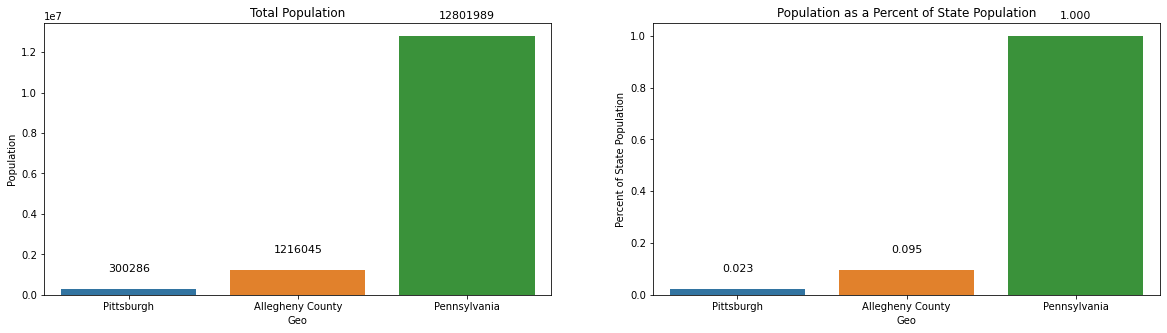

In [6]:
penn_pop = penn.loc[:,['Geo','TotalPop']]
penn_pop['TotalPop_Perc'] = penn_pop['TotalPop']/12801989

fig = plt.figure(figsize = [20,5])

ax1 = fig.add_subplot(1,2,1)
g = sns.barplot(ax = ax1, data = penn, x = 'Geo', y = 'TotalPop') # pass ax1
g.set_title('Total Population')
g.set_ylabel('Population')

# annotate data labels
for p in ax1.patches:
             ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, xytext=(0, 20),
                 textcoords='offset points')

ax2 = fig.add_subplot(1,2,2)
g = sns.barplot(ax = ax2, data = penn_pop, x = 'Geo', y = 'TotalPop_Perc') # pass ax2
g.set_title('Population as a Percent of State Population')
g.set_ylabel('Percent of State Population')

# annotate data labels
for p in ax2.patches:
             ax2.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, xytext=(0, 20),
                 textcoords='offset points')

plt.close(2)
plt.close(3)
#plt.tight_layout()

### Aging
While the county has a higher percentage of the population aged 65 and older, Pittsburgh has a lower percentage than both the state and county.

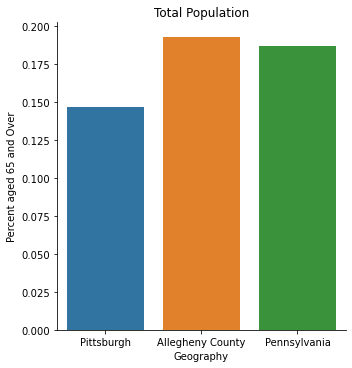

In [7]:
sns.catplot(data = penn, x = 'Geo', y = 'Percent65andOver', kind = 'bar')
plt.title('Total Population')
plt.ylabel('Percent aged 65 and Over')
plt.xlabel('Geography');

**Race:** The state is more white than both the county and Pittsburgh. Pittsburgh is the least white. The reverse trend is true for the black population - drilling down in geography from state to city, Pittsburgh is more black. 

In [8]:
penn_race = penn.loc[:,['Geo','PercentWhiteAlone','PercentBlackAlone']]
penn_race

,Geo,PercentWhiteAlone,PercentBlackAlone
0,Pittsburgh,0.668,0.230
1,Allegheny County,0.799,0.134
2,Pennsylvania,0.816,0.120


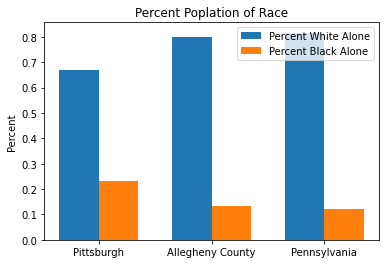

''

In [9]:
ind = np.arange(len(penn_race))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar( x = (ind - width/2), height = penn_race['PercentWhiteAlone'], width = width, label='Percent White Alone')
rects2 = ax.bar(x = (ind + width/2), height = penn_race['PercentBlackAlone'], width = width, label='Percent Black Alone')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Percent Poplation of Race')
ax.set_xticks(ind)
ax.set_xticklabels(('Pittsburgh', 'Allegheny County', 'Pennsylvania'))
ax.legend()


plt.show()

;

**Housing:** Housing data is dereived from the American Community Survey's (ACS) 2015-2019 5-Year estimate dataset. Home ownership decreases with geography. The county is closet to the state as a whole in ownership rates with the county rate being 64.3 percent and the state rate being 68.9 percent. In terms of value of owned units, the median value decreases with geography. Median gross rent has an interesting trend - Pittsburgh's median gross rent of \\$958 is more similar to the state's \\$938. Median gross rent in the county is lower at \\$890. And finally, household size decreases with geography, but only slightly. State average household size (ahs) was 2.45, whereas city was 2.02.

In [10]:
pal = sns.color_palette()
pal.as_hex()[:3]

['#1f77b4', '#ff7f0e', '#2ca02c']

''

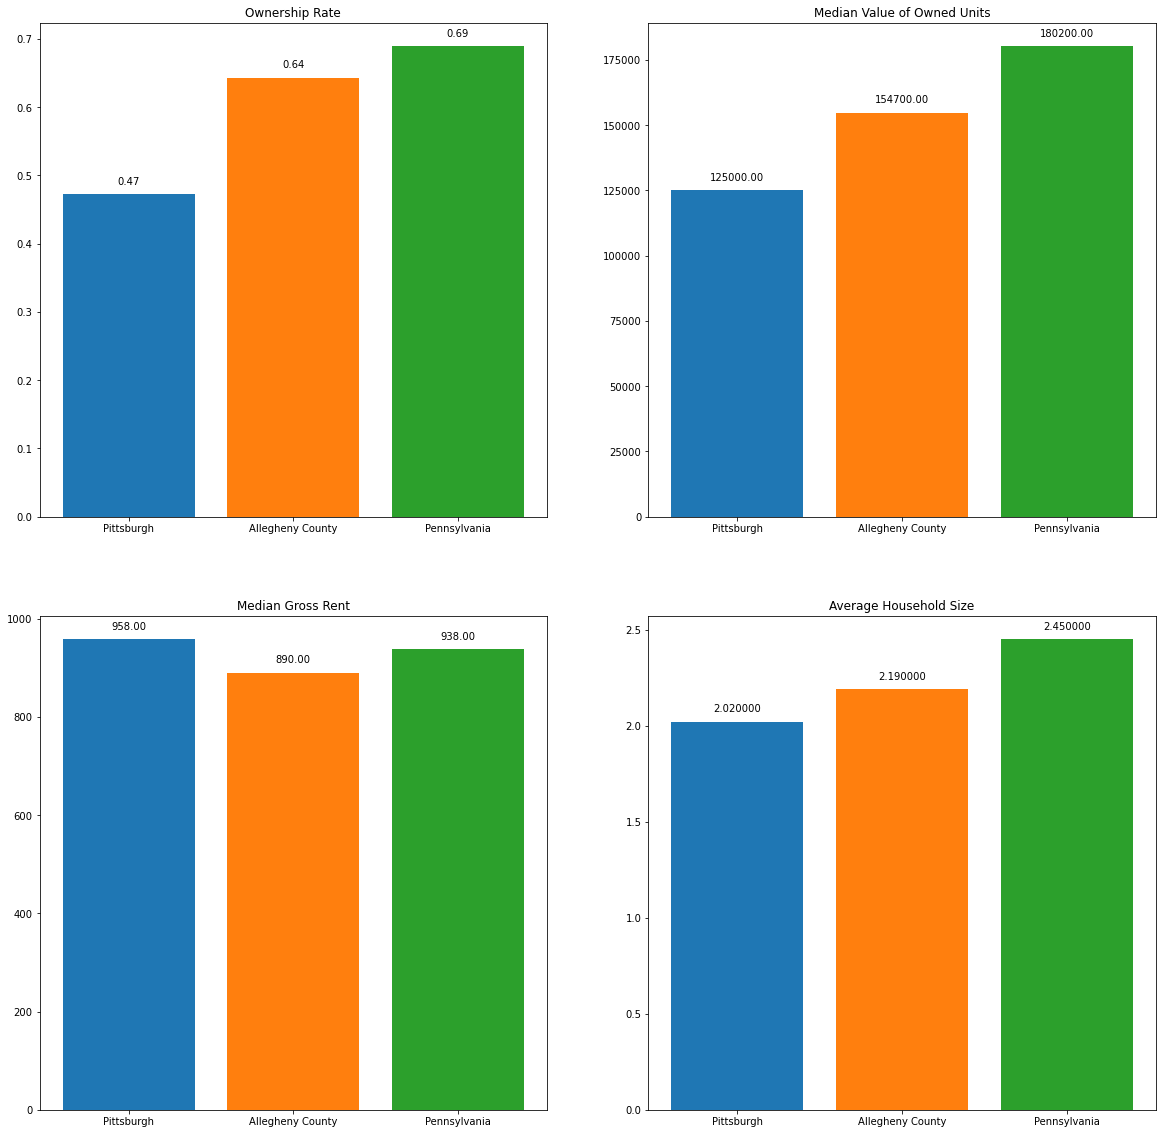

In [11]:
penn_house = penn.loc[:,['Geo','OwnershipRate','MedianValueofOwnedUnits','MedianGrossRent','HouseholdSize']]
color = pal.as_hex()[:3]

plt.figure(figsize = [20,20])

plt.subplot(2,2,1)
plt.bar(data = penn_house, x = 'Geo', height = penn_house['OwnershipRate'],color = color)
plt.title('Ownership Rate')

for x,y in zip(penn_house.Geo,penn_house.OwnershipRate):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.subplot(2,2,2)
plt.bar(data = penn_house, x = 'Geo', height = penn_house['MedianValueofOwnedUnits'], color = color)
plt.title('Median Value of Owned Units')

for x,y in zip(penn_house.Geo,penn_house.MedianValueofOwnedUnits):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.subplot(2,2,3)
plt.bar(data = penn_house, x = 'Geo', height = penn_house['MedianGrossRent'], color = color)
plt.title('Median Gross Rent')

for x,y in zip(penn_house.Geo,penn_house.MedianGrossRent):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



plt.subplot(2,2,4)
plt.bar(data = penn_house, x = 'Geo', height = penn_house['HouseholdSize'], color = color)
plt.title('Average Household Size')

for x,y in zip(penn_house.Geo,penn_house.HouseholdSize):

    label = "{:0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


;

**Education, Employment, and Income:** With decreasing geography, the percentage of population holding at least a bachelor's degree increases - Pittsburgh residents are more likely to have at least a bachelor's degree than those of the state as a whole. Nevertheless, median income decreases with geography. Median income in Pittsburgh was \\$48,711, which is signficantly lower than the state median of \\$61,744. Lastly, the poverty rate of 20.5 percent Pittsburgh was much higher than the state rate of 12.0 percent.

In [12]:
penn_ed = penn.loc[:,['Geo','BachelorsDegreeorHigher','InCivilianLaborForce','MedianIncome','PovertyRate']]
penn_ed

,Geo,BachelorsDegreeorHigher,InCivilianLaborForce,MedianIncome,PovertyRate
0,Pittsburgh,0.446,0.637,48711,0.205
1,Allegheny County,0.416,0.649,61043,0.108
2,Pennsylvania,0.314,0.627,61744,0.120


''

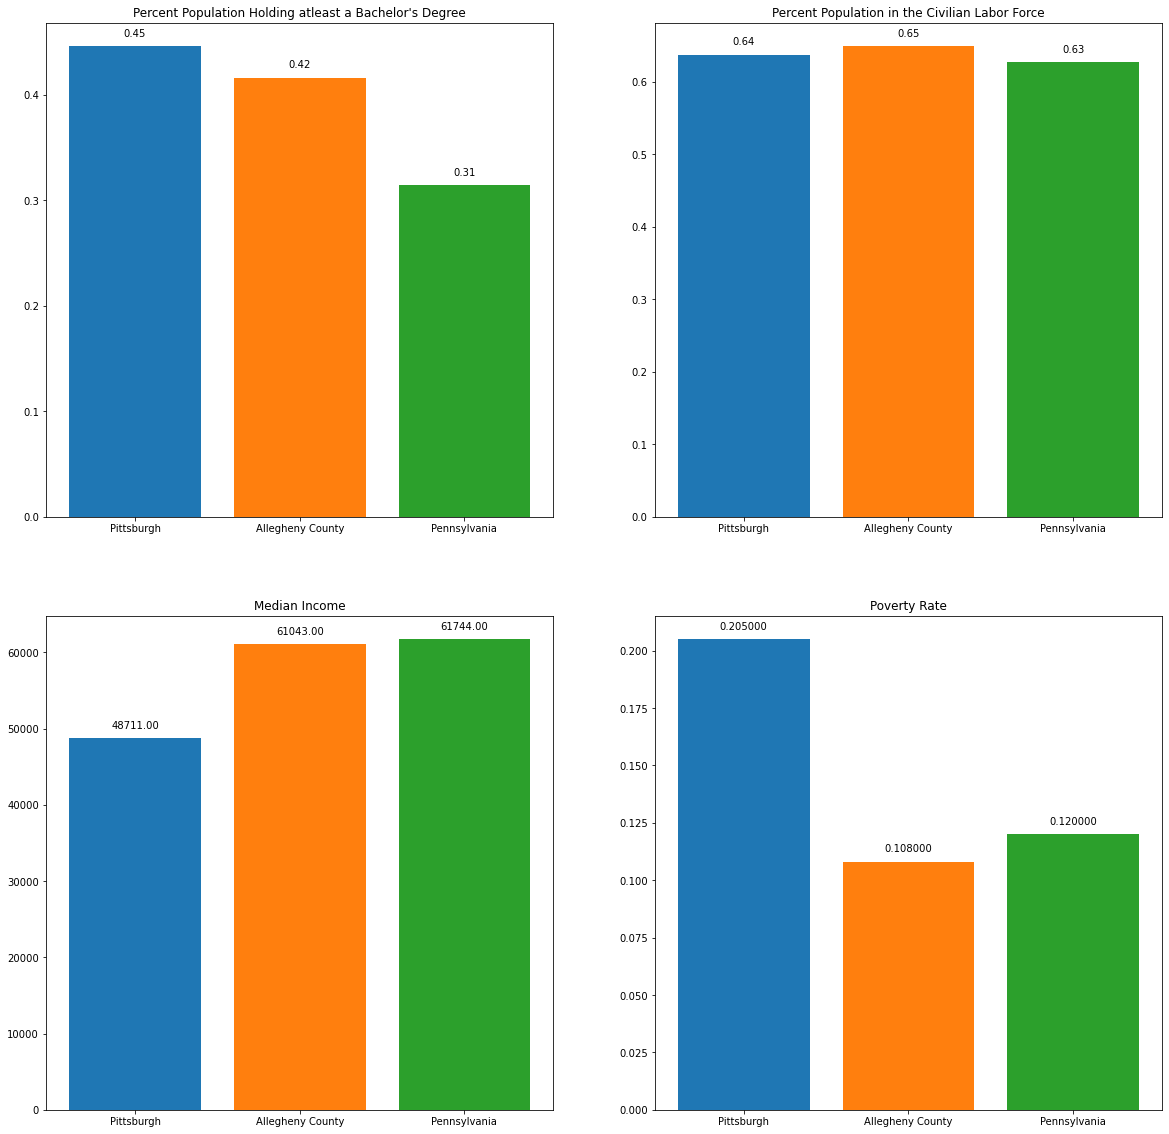

In [13]:
plt.figure(figsize = [20,20])

plt.subplot(2,2,1)
plt.bar(data = penn_ed, x = 'Geo', height = penn_ed['BachelorsDegreeorHigher'],color = color)
plt.title('Percent Population Holding atleast a Bachelor\'s Degree')

for x,y in zip(penn_ed.Geo,penn_ed.BachelorsDegreeorHigher):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.subplot(2,2,2)
plt.bar(data = penn_ed, x = 'Geo', height = penn_ed['InCivilianLaborForce'], color = color)
plt.title('Percent Population in the Civilian Labor Force')

for x,y in zip(penn_ed.Geo,penn_ed.InCivilianLaborForce):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.subplot(2,2,3)
plt.bar(data = penn_ed, x = 'Geo', height = penn_ed['MedianIncome'], color = color)
plt.title('Median Income')

for x,y in zip(penn_ed.Geo,penn_ed.MedianIncome):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



plt.subplot(2,2,4)
plt.bar(data = penn_ed, x = 'Geo', height = penn_ed['PovertyRate'], color = color)
plt.title('Poverty Rate')

for x,y in zip(penn_ed.Geo,penn_ed.PovertyRate):

    label = "{:0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


;

## Comparison with other U.S. Cities
This section compares Pittsburgh demographics with that of other cities that are commonly considered to be similar to Pittsburgh in terms of population size and economy. Washington, D.C. is included in this list only because the author of this notebook is from D.C.